In [6]:
import glob
from PIL import Image
i=0
for img in glob.glob("/content/A/Tumor/*png"):
  image=Image.open(img)
  image=image.resize((32,32))
  image.save(img)

  print("Done resizing of patch ")

Done resizing of patch 
Done resizing of patch 
Done resizing of patch 
Done resizing of patch 
Done resizing of patch 
Done resizing of patch 
Done resizing of patch 
Done resizing of patch 
Done resizing of patch 
Done resizing of patch 
Done resizing of patch 
Done resizing of patch 
Done resizing of patch 
Done resizing of patch 
Done resizing of patch 
Done resizing of patch 


In [7]:
import glob
from PIL import Image
i=0
for img in glob.glob("/content/B/Not tumor/*png"):
  image=Image.open(img)
  image=image.resize((32,32))
  image.save(img)

  print("Done resizing of patch ")

Done resizing of patch 
Done resizing of patch 
Done resizing of patch 
Done resizing of patch 
Done resizing of patch 
Done resizing of patch 
Done resizing of patch 
Done resizing of patch 
Done resizing of patch 
Done resizing of patch 
Done resizing of patch 
Done resizing of patch 
Done resizing of patch 
Done resizing of patch 
Done resizing of patch 
Done resizing of patch 


In [8]:
data_dir_1 = '/content/A'
data_dir_2 = '/content/B'

import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np

#import helper
import torch.nn as nn
import torch.nn.functional as F
# necessary imports
import torch
from torchvision import datasets
from torchvision import transforms
import torch
import torch.optim as optim
%matplotlib inline

In [11]:
def get_dataloader_1(batch_size, image_size, data_dir='/content/A/'):
    
    transform = transforms.Compose([transforms.Resize(image_size)
                                    ,transforms.ToTensor()])
                        
    imagenet_data = datasets.ImageFolder(data_dir,transform= transform)
    
    data_loader = torch.utils.data.DataLoader(imagenet_data,
                                          batch_size,
                                          shuffle=True)
    return data_loader


In [12]:
def get_dataloader_2(batch_size, image_size, data_dir='/content/B/'):
    
    transform = transforms.Compose([transforms.Resize(image_size)
                                    ,transforms.ToTensor()])
                        
    imagenet_data = datasets.ImageFolder(data_dir,transform= transform)
    
    data_loader = torch.utils.data.DataLoader(imagenet_data,
                                          batch_size,
                                          shuffle=True)
    return data_loader


In [13]:

batch_size = 50
img_size = 32

# Call your function and get a dataloader
celeba_train_loader_1 = get_dataloader_1(batch_size, img_size)
celeba_train_loader_2 = get_dataloader_2(batch_size, img_size)


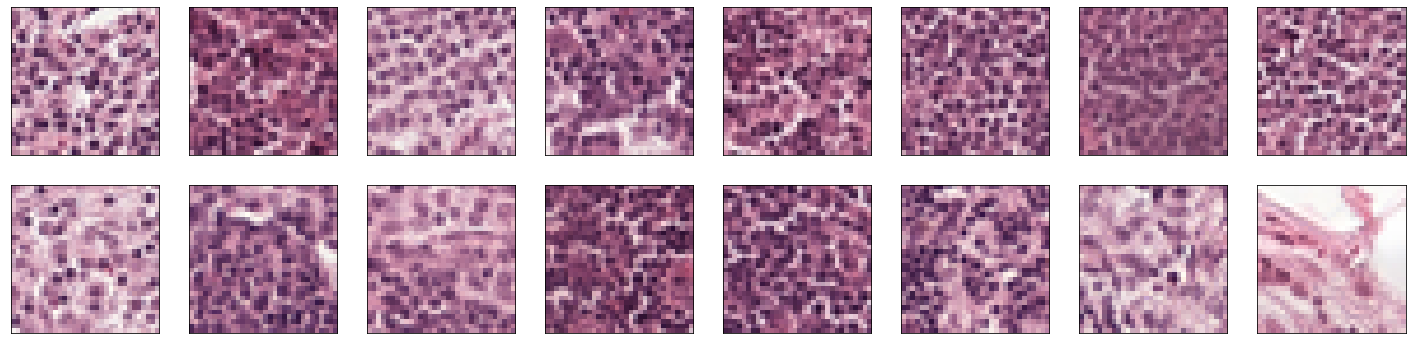

In [15]:

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


dataiter = iter(celeba_train_loader_1)
images, _ = dataiter.next() 


fig = plt.figure(figsize=(25, 6))
plot_size=16
for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, plot_size/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])

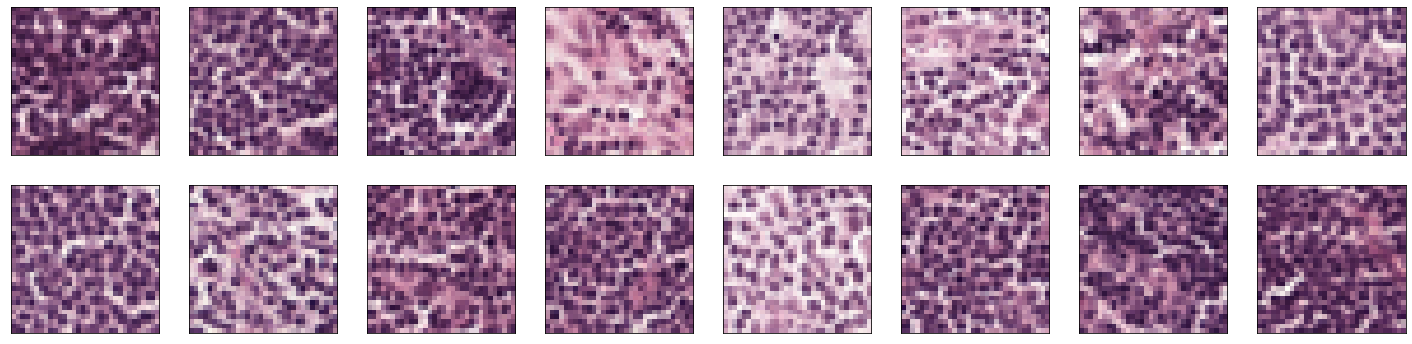

In [16]:

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


dataiter = iter(celeba_train_loader_2)
images, _ = dataiter.next() 


fig = plt.figure(figsize=(25, 6))
plot_size=16
for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, plot_size/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])

In [17]:

celeba_train_loader_1
celeba_train_loader_2

In [18]:
import numpy as np
import glob
from PIL import Image

In [19]:
train_files_1=[]
train_files_2=[]

In [20]:
for img in glob.glob("/content/A/Tumor/*png"):
  train_files_1.append(img)

In [21]:
for img in glob.glob("/content/B/Not tumor/*png"):
  train_files_2.append(img)

In [22]:
train_files_1

['/content/A/Tumor/8.png',
 '/content/A/Tumor/6.png',
 '/content/A/Tumor/3.png',
 '/content/A/Tumor/13.png',
 '/content/A/Tumor/4.png',
 '/content/A/Tumor/11.png',
 '/content/A/Tumor/12.png',
 '/content/A/Tumor/1.png',
 '/content/A/Tumor/7.png',
 '/content/A/Tumor/15.png',
 '/content/A/Tumor/10.png',
 '/content/A/Tumor/0.png',
 '/content/A/Tumor/5.png',
 '/content/A/Tumor/2.png',
 '/content/A/Tumor/9.png',
 '/content/A/Tumor/14.png']

In [23]:
train_files_2

['/content/B/Not tumor/8.png',
 '/content/B/Not tumor/6.png',
 '/content/B/Not tumor/3.png',
 '/content/B/Not tumor/13.png',
 '/content/B/Not tumor/4.png',
 '/content/B/Not tumor/11.png',
 '/content/B/Not tumor/12.png',
 '/content/B/Not tumor/1.png',
 '/content/B/Not tumor/7.png',
 '/content/B/Not tumor/15.png',
 '/content/B/Not tumor/10.png',
 '/content/B/Not tumor/0.png',
 '/content/B/Not tumor/5.png',
 '/content/B/Not tumor/2.png',
 '/content/B/Not tumor/9.png',
 '/content/B/Not tumor/14.png']

In [24]:
print(len(train_files_1))
print(len(train_files_2))

16
16


In [28]:
Tumor_dataset = np.ndarray(shape=(len(train_files_1),32,32,3),dtype=np.float32)
Not_tumor_dataset = np.ndarray(shape=(len(train_files_2),32,32,3),dtype=np.float32)

In [31]:
Tumor_dataset.shape


(16, 32, 32, 3)

In [32]:
Not_tumor_dataset.shape

(16, 32, 32, 3)

In [33]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img

In [34]:
i=0
for files in train_files_1:
  img=load_img(files)
  x=img_to_array(img)
  x=x.reshape(32,32,3)
  x=(x.astype(np.float32) - 127.5) / 127.5
  Tumor_dataset[i]=x
  i+=1

In [35]:
i=0
for files in train_files_2:
  img=load_img(files)
  x=img_to_array(img)
  x=x.reshape(32,32,3)
  x=(x.astype(np.float32) - 127.5) / 127.5
  Not_tumor_dataset[i]=x
  i+=1

In [37]:
Tumor_dataset.shape

(16, 32, 32, 3)

In [38]:
Not_tumor_dataset.shape

(16, 32, 32, 3)

In [39]:
import matplotlib.pyplot as plt


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


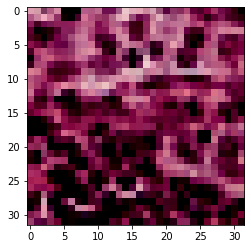

In [40]:
plt.imshow(Tumor_dataset[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


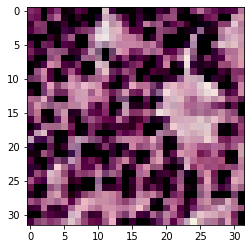

In [41]:
plt.imshow(Not_tumor_dataset[10])

In [42]:
import numpy as np 
import pandas as pd 
from subprocess import check_output


In [43]:
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep

In [54]:
folder_1 = "/content/A/Tumor"
folder_2 = "/content/B/Not tumor"
onlyfiles_1 = [f for f in os.listdir(folder_1) if os.path.isfile(os.path.join(folder_1, f))]
onlyfiles_2 = [f for f in os.listdir(folder_2) if os.path.isfile(os.path.join(folder_2, f))]

In [ ]:
onlyfiles_1

In [ ]:
onlyfiles_2

In [58]:
y_train_Tumor = []
y_train_Not_tumor = []

In [59]:

for _file in onlyfiles_1:
    
    y_train_Tumor.append(int(1))

In [62]:
y_train_Tumor

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [61]:
for _file in onlyfiles_2:
    
    y_train_Not_tumor.append(int(0))

In [63]:
y_train_Not_tumor

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [64]:
len(y_train_Tumor)

16

In [65]:
print("Files in train_files: %d" % len(train_files_1))

Files in train_files: 16


In [66]:
print("Files in train_files: %d" % len(train_files_2))

Files in train_files: 16


In [68]:
import numpy as np

In [ ]:
plt.imshow(Tumor_dataset[0])

In [97]:
Final_Dataset = np.vstack((Tumor_dataset, Not_tumor_dataset))

In [98]:
Final_Dataset.shape

(32, 32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


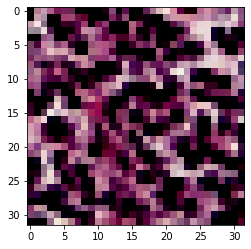

In [100]:
plt.imshow(Final_Dataset[31])

In [101]:
Final_Label = y_train_Tumor + y_train_Not_tumor

In [102]:
len(Final_Label)

32

In [103]:
Final_Label

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(Final_Dataset, Final_Label, test_size=0.2, random_state=33)

In [111]:
X_test.shape

(7, 32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


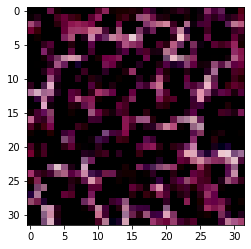

In [118]:
plt.imshow(X_test[6])

In [110]:
y_test

[0, 0, 0, 1, 1, 1, 0]

In [109]:
y_train

[0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0]

In [106]:
X_train.shape

(25, 32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


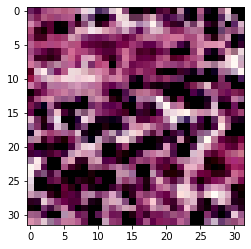

In [123]:
plt.imshow(X_train[5])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


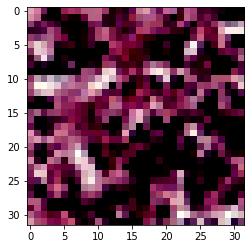

In [107]:
plt.imshow(X_test[0])

In [124]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=33)
print("Train set size: {0}, Val set size: {1}, Test set size: {2}".format(len(X_train), len(X_val), len(X_test)))

Train set size: 25, Val set size: 4, Test set size: 3


In [125]:
y_train

[0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0]

In [126]:
y_test

[0, 0, 1]

In [127]:
y_val

[1, 1, 0, 0]